In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Importing dataset and cleaning dataset

In [95]:
start = '2005-01-01'
end = '2015-12-31'
stock = 'GOOG'

web_data = yf.download(stock , start , end)
web_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-01-03,5.025025,5.048079,4.845304,4.893394,636143518
2005-01-04,4.821506,5.030479,4.796220,4.992552,552298420
2005-01-05,4.796964,4.880999,4.765234,4.795476,330698912
2005-01-06,4.674010,4.856211,4.653434,4.835883,417041336
2005-01-07,4.805393,4.815309,4.679711,4.725819,387964757
...,...,...,...,...,...
2015-12-23,37.338646,37.532726,37.024635,37.495902,31318000
2015-12-24,37.243595,37.390403,37.155018,37.300827,10544000


In [96]:
web_data2 = web_data.reset_index()
web_data2

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2005-01-03,5.025025,5.048079,4.845304,4.893394,636143518
1,2005-01-04,4.821506,5.030479,4.796220,4.992552,552298420
2,2005-01-05,4.796964,4.880999,4.765234,4.795476,330698912
3,2005-01-06,4.674010,4.856211,4.653434,4.835883,417041336
4,2005-01-07,4.805393,4.815309,4.679711,4.725819,387964757
...,...,...,...,...,...,...
2763,2015-12-23,37.338646,37.532726,37.024635,37.495902,31318000
2764,2015-12-24,37.243595,37.390403,37.155018,37.300827,10544000
2765,2015-12-28,37.945774,37.969663,37.299338,37.468535,30306000


In [99]:
web_data2.isnull().sum()

Price   Ticker
Date              0
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [100]:
web_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        2768 non-null   datetime64[ns]
 1   (Close, GOOG)   2768 non-null   float64       
 2   (High, GOOG)    2768 non-null   float64       
 3   (Low, GOOG)     2768 non-null   float64       
 4   (Open, GOOG)    2768 non-null   float64       
 5   (Volume, GOOG)  2768 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 129.9 KB


In [101]:
web_data2.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
count,2768,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03
mean,2010-07-02 03:29:07.976878592,15.985409,16.143303,15.824741,15.993411,1.740541e+08
min,2005-01-03 00:00:00,4.337868,4.422399,4.277878,4.345552,1.584340e+05
25%,2007-10-02 18:00:00,11.027923,11.200642,10.903668,11.049924,7.422116e+07
50%,2010-07-01 12:00:00,13.925228,14.086604,13.789009,13.925970,1.211384e+08
75%,2013-04-03 06:00:00,20.074505,20.210784,19.936740,20.022945,2.280707e+08
max,2015-12-30 00:00:00,38.646954,38.815156,38.164235,38.646950,1.650833e+09
std,NaN,7.378428,7.422248,7.327812,7.381579,1.650608e+08


# Basic Plot

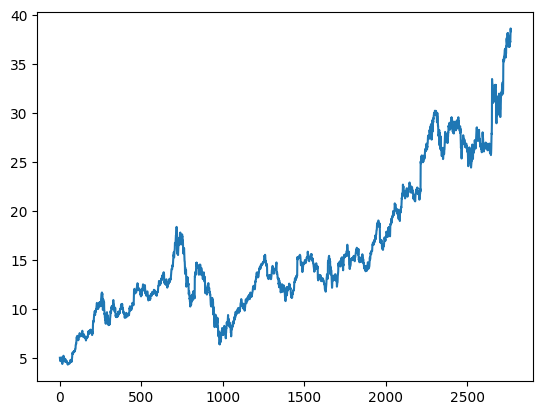

In [97]:
def c_plot(x):
    plt.plot(x)
    
c_plot(web_data2.Close)


# Moving Average Concept

In [102]:
ma_100 = web_data2.Close.rolling(100).mean()
ma_200 = web_data2.Close.rolling(200).mean()


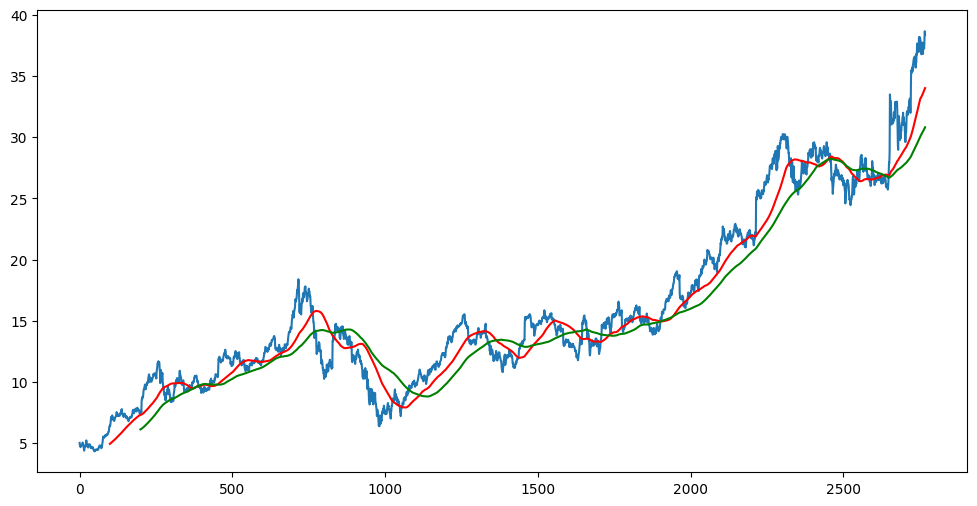

In [103]:
def creat_plot( x_value , y_value , color , z_value , color2):
    plt.figure(figsize=(12,6))
    plt.plot(x_value)
    plt.plot(y_value , color)
    plt.plot(z_value , color2)
    
creat_plot(web_data2.Close , ma_100 , 'r' , ma_200 , 'g')


# Training and Test sets

In [105]:
data_for_training=pd.DataFrame(web_data2['Close'][0:int(len(web_data2)*0.70)])
data_for_testing =pd.DataFrame(web_data2['Close'][int(len(web_data2)*0.70):int(len(web_data2))])

print(data_for_training.shape)
print(data_for_testing.shape)

(1937, 1)
(831, 1)


In [106]:
data_for_training.head()

Ticker,GOOG
0,5.025025
1,4.821506
2,4.796964
3,4.674010
4,4.805393


In [107]:
data_for_testing.head()

Ticker,GOOG
1937,17.158857
1938,17.126385
1939,17.502188
1940,17.592419
1941,17.599859


# Scaling Data

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler(feature_range=(0,1))


In [109]:
scaled_web_data = scaler1.fit_transform(data_for_training)
scaled_web_data

array([[0.04890612],
       [0.03442131],
       [0.03267463],
       ...,
       [0.9252117 ],
       [0.93712098],
       [0.92762885]])

In [111]:
scaled_web_data.shape

(1937, 1)

# Making Time series Data

In [112]:
X_train=[]
Y_train=[]

for i in range (100 , scaled_web_data.shape[0]):
    X_train.append(scaled_web_data[i-100:i])
    Y_train.append(scaled_web_data[i, 0])
    #x_train.append(d_train.iloc[i-100:i].values) # use .iloc and .values
    #y_train.append(d_train.iloc[i].values) # use .iloc and .values

    
X_train , Y_train = np.array(X_train) , np.array(Y_train)

In [113]:
X_train.shape

(1837, 100, 1)

In [114]:
Y_train.shape

(1837,)

# Model Building

In [115]:
from keras.models import Sequential
from keras.layers import LSTM, Dense , Dropout

In [116]:
model = Sequential()
model.add(LSTM(units = 50 , activation='relu' , return_sequences=True , input_shape = (X_train.shape[1] , 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation='relu' , return_sequences=True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation='relu' , return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\panse\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [117]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:

model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - loss: 0.1417
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - loss: 0.0141
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - loss: 0.0123
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - loss: 0.0118
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - loss: 0.0105
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - loss: 0.0092
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - loss: 0.0085
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - loss: 0.0089
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - loss: 0.0076
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 0.0077
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - loss: 0.0070
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - loss: 0.0080
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - loss: 0.0067
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - loss: 0.0071
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - 

In [120]:
data_for_testing.head()

Ticker,GOOG
1937,17.158857
1938,17.126385
1939,17.502188
1940,17.592419
1941,17.599859


In [122]:
p_100_days = data_for_training.tail(100)

In [125]:
final_dataframe = pd.concat((p_100_days , data_for_testing) , ignore_index=True)

In [126]:
final_dataframe

Ticker,GOOG
0,14.856187
1,14.775868
2,14.814043
3,14.905020
4,15.114490
...,...
926,37.338646
927,37.243595
928,37.945774
929,38.646954


In [127]:
final_dataframe2 = scaler1.fit_transform(final_dataframe)

In [128]:
final_dataframe2

array([[0.04025117],
       [0.03701102],
       [0.03855103],
       [0.04222115],
       [0.05067142],
       [0.05642162],
       [0.05593155],
       [0.04580127],
       [0.04538127],
       [0.04821134],
       [0.05197148],
       [0.03792109],
       [0.04850134],
       [0.05374148],
       [0.05010141],
       [0.05461149],
       [0.0461813 ],
       [0.0449513 ],
       [0.0520615 ],
       [0.06988192],
       [0.06400176],
       [0.04135113],
       [0.05506154],
       [0.04175113],
       [0.05041138],
       [0.04461128],
       [0.03248094],
       [0.035291  ],
       [0.02918085],
       [0.02181062],
       [0.01193037],
       [0.01954051],
       [0.01136028],
       [0.02152061],
       [0.01918057],
       [0.02140058],
       [0.00945024],
       [0.00605017],
       [0.00204004],
       [0.        ],
       [0.00546012],
       [0.01180033],
       [0.02248065],
       [0.01846048],
       [0.00616012],
       [0.01243039],
       [0.00165004],
       [0.005

In [130]:
final_dataframe2.shape

(931, 1)

In [131]:
X_test=[]
Y_test=[]

for i in range (100 , final_dataframe2.shape[0]):
    X_test.append(final_dataframe2[i-100:i])
    Y_test.append(final_dataframe2[i, 0])
    #x_train.append(d_train.iloc[i-100:i].values) # use .iloc and .values
    #y_train.append(d_train.iloc[i].values) # use .iloc and .values
X_test , Y_test = np.array(X_test) , np.array(Y_test)

In [132]:
X_test.shape

(831, 100, 1)

In [133]:
Y_test.shape

(831,)

# Predictions

In [134]:
Y_Prediction = model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


In [136]:
Y_Prediction.shape

(831, 1)

In [137]:
Y_test

array([0.13314373, 0.13183375, 0.1469941 , 0.15063413, 0.15093429,
       0.1592344 , 0.1684547 , 0.16907472, 0.17494491, 0.19033533,
       0.19011543, 0.19441541, 0.19745542, 0.19545555, 0.20273568,
       0.19794556, 0.20345573, 0.20900591, 0.20860595, 0.19879572,
       0.1850453 , 0.18551528, 0.19243539, 0.18570518, 0.18193512,
       0.18565524, 0.19644544, 0.13595383, 0.12274349, 0.11962338,
       0.12130339, 0.1182533 , 0.11871343, 0.11610331, 0.12125345,
       0.12854351, 0.12887368, 0.12391343, 0.12267347, 0.10807312,
       0.09324262, 0.10398289, 0.106853  , 0.10000292, 0.09350262,
       0.08821251, 0.08813249, 0.10916296, 0.11092308, 0.10682299,
       0.10892305, 0.10210289, 0.11166305, 0.12462348, 0.1328438 ,
       0.13932394, 0.13620383, 0.13198371, 0.12877357, 0.13208382,
       0.12516348, 0.12637367, 0.13783382, 0.13851386, 0.14365416,
       0.14291403, 0.16173457, 0.16202465, 0.16106446, 0.16331463,
       0.15658435, 0.15045431, 0.14982413, 0.14724402, 0.14096

In [138]:
Y_Prediction

array([[0.19524336],
       [0.19637337],
       [0.19742027],
       [0.19837883],
       [0.19931844],
       [0.20028058],
       [0.20133072],
       [0.20256358],
       [0.20400271],
       [0.20563912],
       [0.20753726],
       [0.20968845],
       [0.21203409],
       [0.21449049],
       [0.21692657],
       [0.21927287],
       [0.22143435],
       [0.22338048],
       [0.22516057],
       [0.2268172 ],
       [0.2282768 ],
       [0.22933866],
       [0.22987987],
       [0.22997072],
       [0.22969538],
       [0.22912723],
       [0.22840203],
       [0.22777203],
       [0.22683606],
       [0.2251121 ],
       [0.22237894],
       [0.21875301],
       [0.2145525 ],
       [0.21020019],
       [0.20608333],
       [0.20255113],
       [0.19988917],
       [0.19820717],
       [0.19739264],
       [0.19722119],
       [0.19731686],
       [0.1972324 ],
       [0.19680059],
       [0.19607754],
       [0.19513693],
       [0.19401386],
       [0.19272275],
       [0.191

In [139]:
scaler1.scale_

array([0.04034123])

In [140]:
scal_factor = 1/0.04034123
Y_Prediction = Y_Prediction * scal_factor
Y_test = Y_test * scal_factor

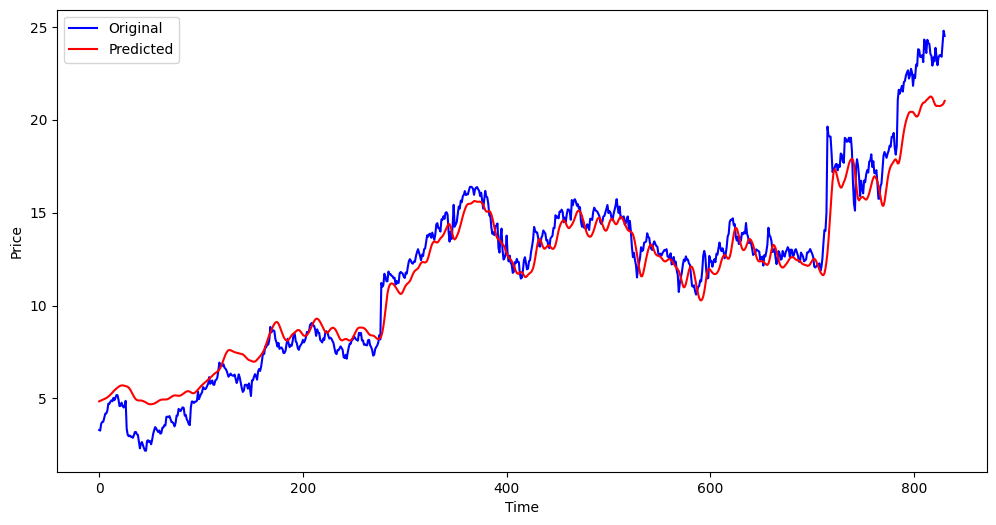

In [142]:
plt.figure(figsize=(12,6))
plt.plot(Y_test , 'b', label = 'Original')
plt.plot(Y_Prediction , 'r', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [144]:
model.save('stpp.keras')